<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Check missing values
print(df[['Employment','JobSat','RemoteWork']].isnull().sum())

# Strategy:
# Fill Employment & RemoteWork with most frequent value (mode)
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

# Drop rows with missing JobSat (since satisfaction is key for analysis)
df = df.dropna(subset=['JobSat'])


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipython-input-2324011871.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_job_sat = df.groupby('ExperienceRange')['JobSat'].median()


ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
20+      8.0
Name: JobSat, dtype: float64


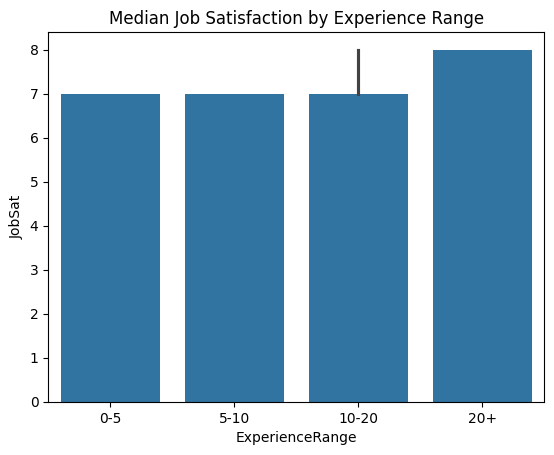

In [4]:
# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience bins
bins = [0, 5, 10, 20, 50]
labels = ['0-5','5-10','10-20','20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Median JobSat by range
exp_job_sat = df.groupby('ExperienceRange')['JobSat'].median()

print(exp_job_sat)

# Plot
sns.barplot(x='ExperienceRange', y='JobSat', data=df, estimator=lambda x: pd.Series(x).median())
plt.title("Median Job Satisfaction by Experience Range")
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


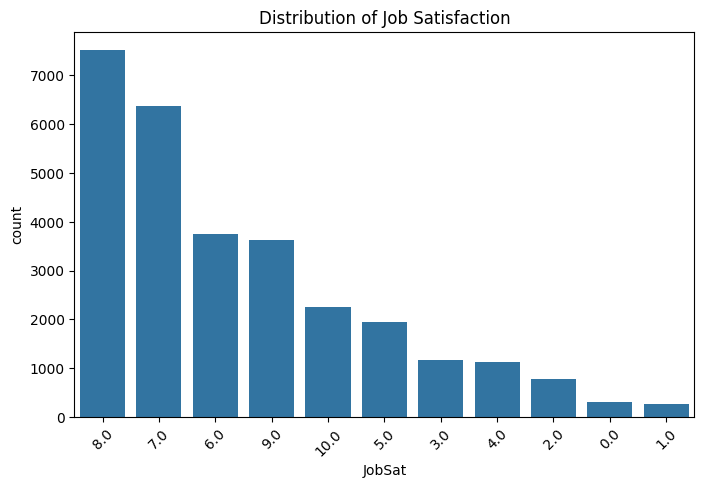

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobSat', data=df, order=df['JobSat'].value_counts().index)
plt.title("Distribution of Job Satisfaction")
plt.xticks(rotation=45)
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


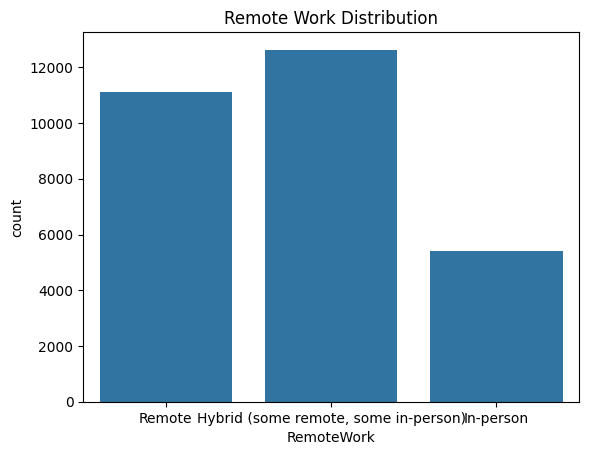

In [11]:
# Remote work distribution
sns.countplot(x='RemoteWork', data=df)
plt.title("Remote Work Distribution")
plt.show()

In [13]:
# Cross-tab Employment vs RemoteWork
remote_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
(remote_employment)

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
"Employed, full-time",10009,4490,8038
"Employed, full-time;Employed, part-time",49,18,60
"Employed, full-time;Independent contractor, freelancer, or self-employed",829,235,1227
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",53,9,55
"Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work",0,2,0
...,...,...,...
"Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time",1,0,2
"Student, full-time;Not employed, but looking for work;Employed, part-time",1,0,0
"Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed",3,0,4


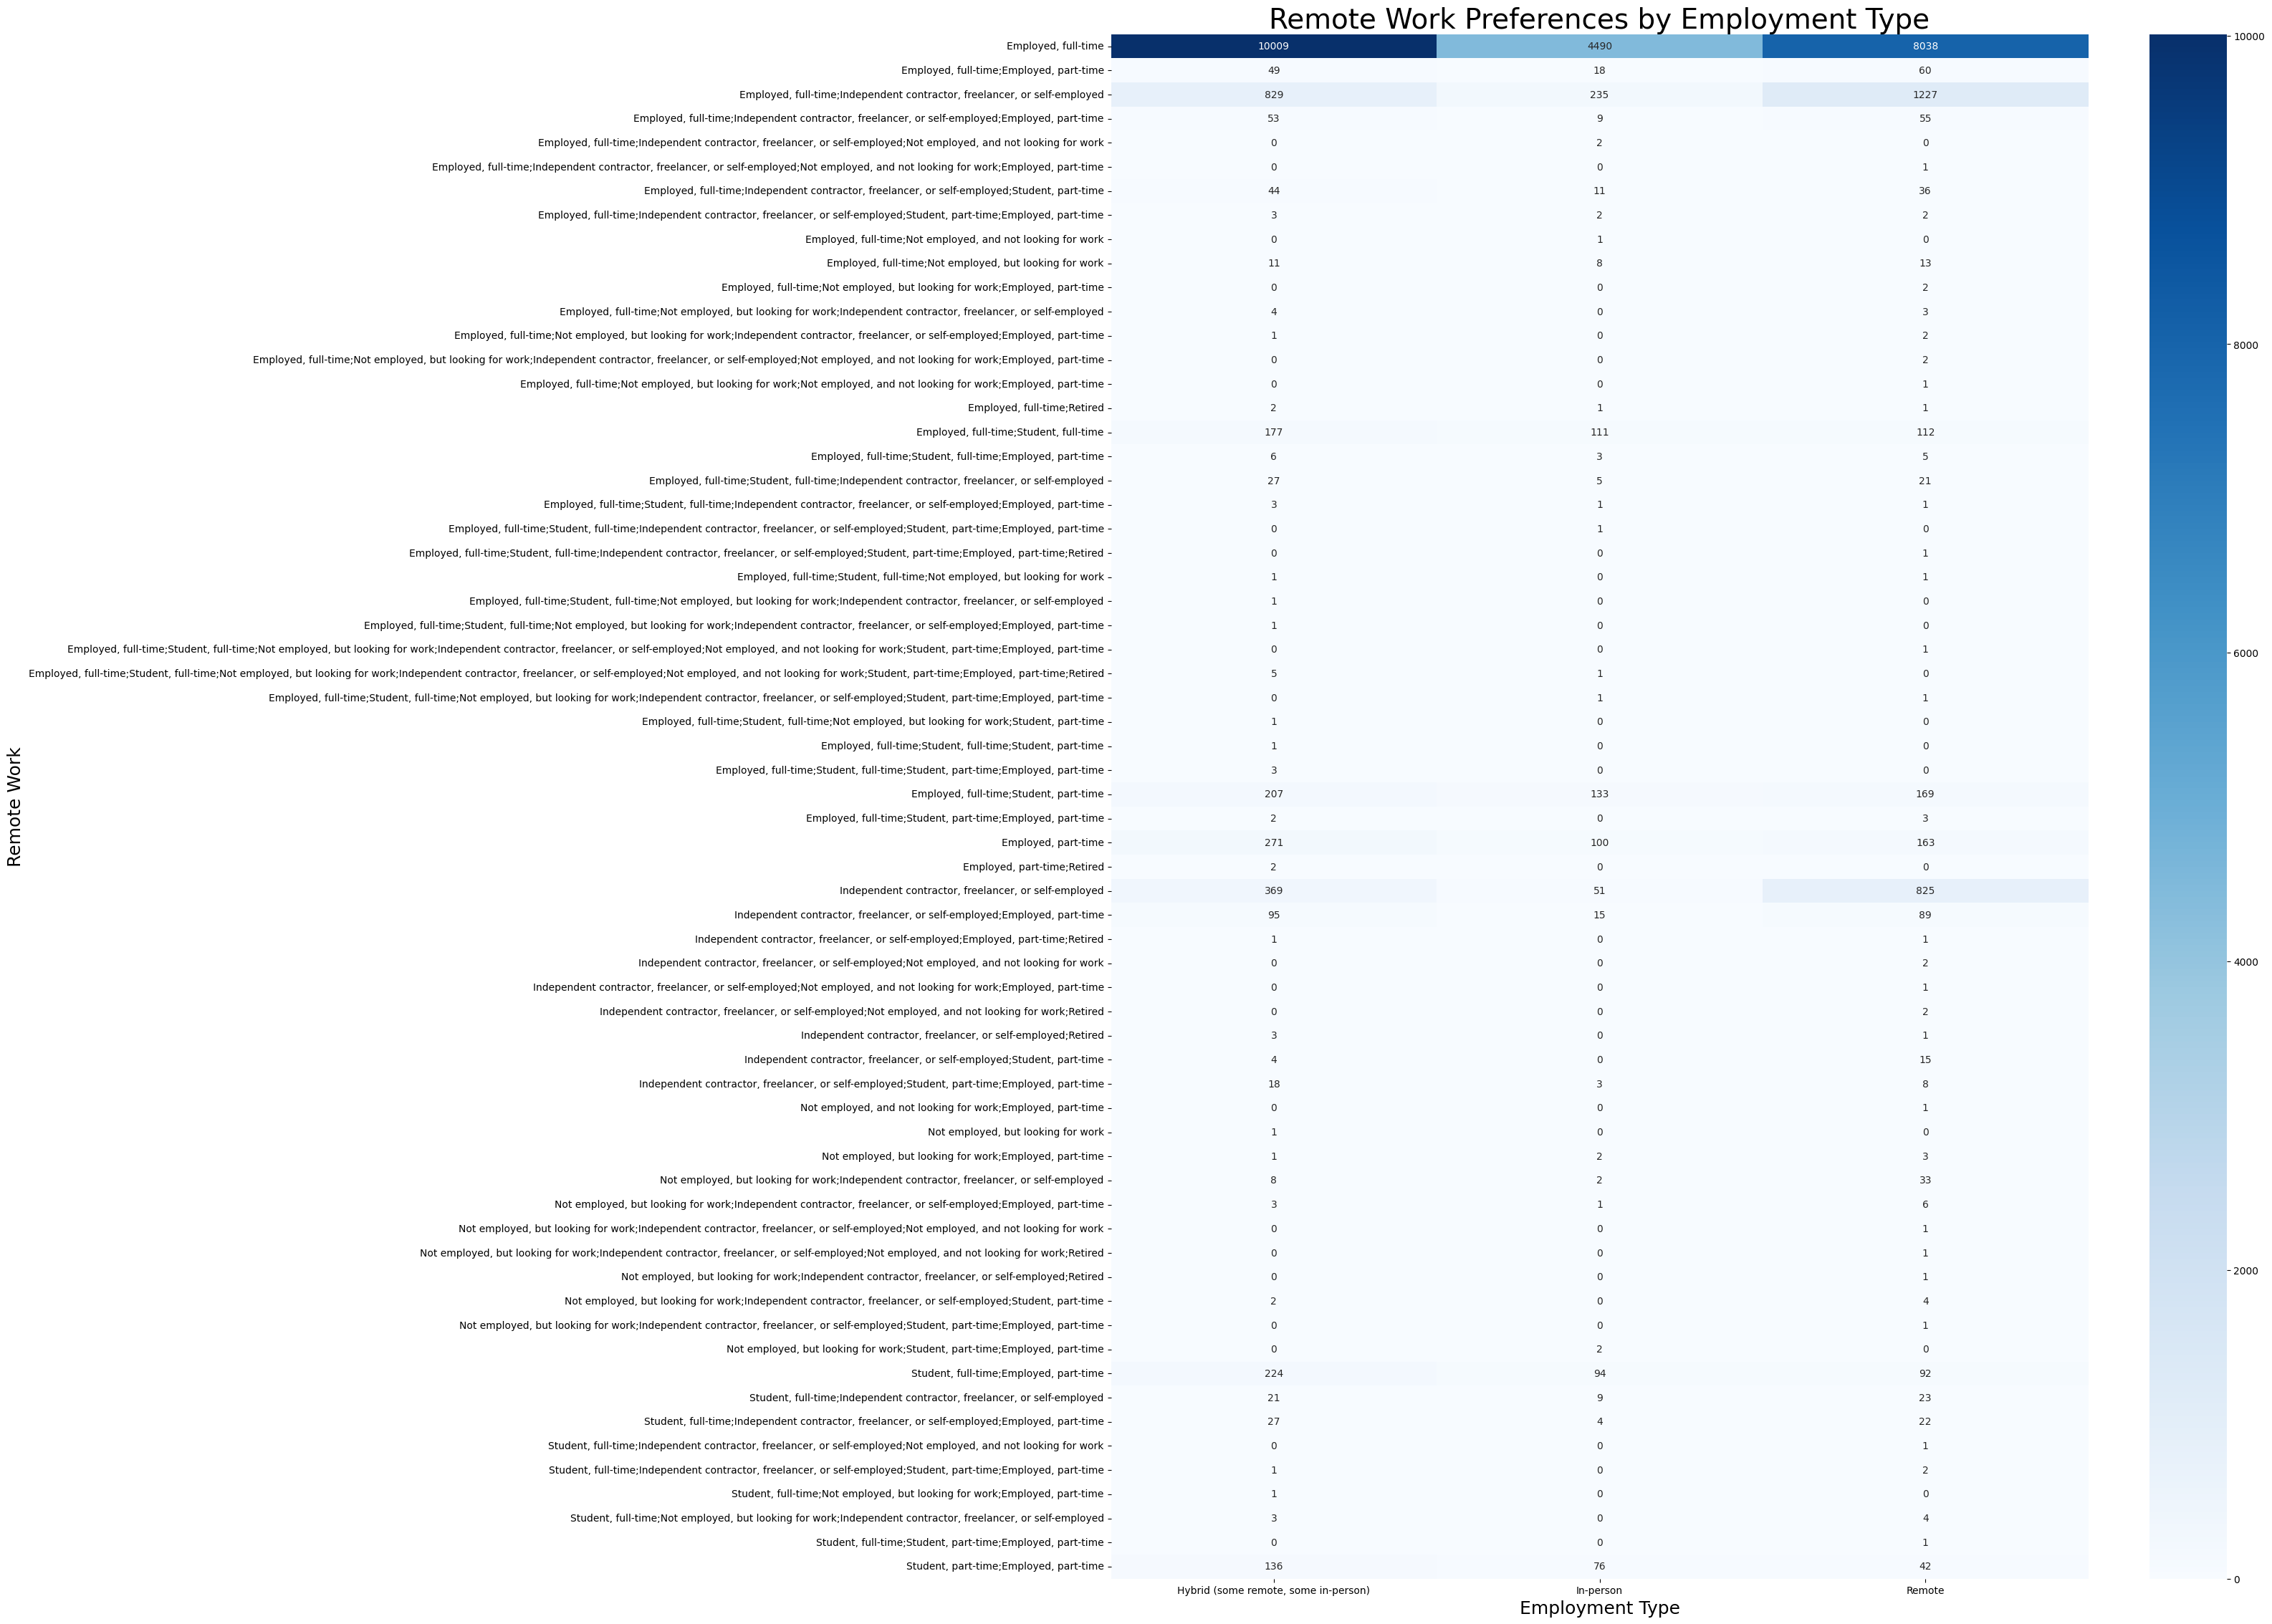

In [20]:
# Heatmap
plt.figure(figsize=(22,28))  # adjust width x height
sns.heatmap(remote_employment, annot=True, fmt='d', cmap='Blues')
plt.title("Remote Work Preferences by Employment Type", fontsize=28)
plt.xlabel("Employment Type", fontsize=18)
plt.ylabel("Remote Work", fontsize=18)
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [26]:
# Check unique country names
print(df['Country'].unique()[:20])   # just first 20 to see exact format


['United States of America' 'Switzerland' 'Germany' 'Ireland' 'Italy'
 'Ukraine' 'Japan' 'Brazil' 'Austria' 'Romania'
 'United Kingdom of Great Britain and Northern Ireland' 'Bulgaria'
 'Turkey' 'Sweden' 'Croatia' 'Pakistan' 'Czech Republic'
 'Republic of North Macedonia' 'Finland' 'Slovakia']


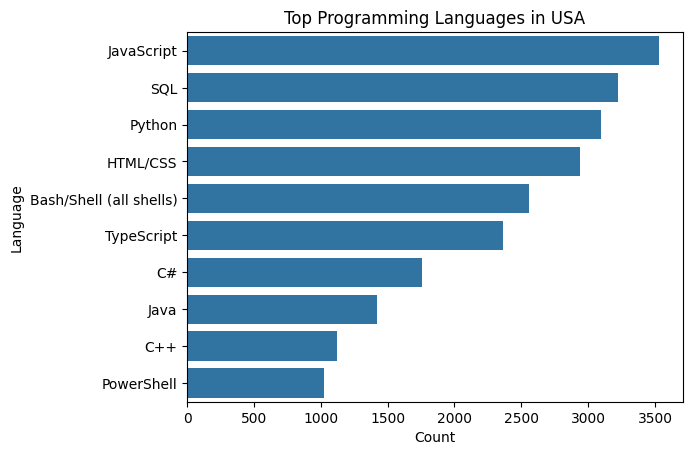

In [27]:
# Split multiple languages into separate rows
lang_df = df[['Country','LanguageHaveWorkedWith']].dropna()
lang_df = lang_df.assign(Language=lang_df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Count languages per country
top_langs = lang_df.groupby(['Country','Language']).size().reset_index(name='Count')

# Example: Top 10 languages in USA
usa_langs = top_langs[top_langs['Country']=='United States of America'].sort_values(by='Count', ascending=False).head(10)

sns.barplot(x='Count', y='Language', data=usa_langs)
plt.title("Top Programming Languages in USA")
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


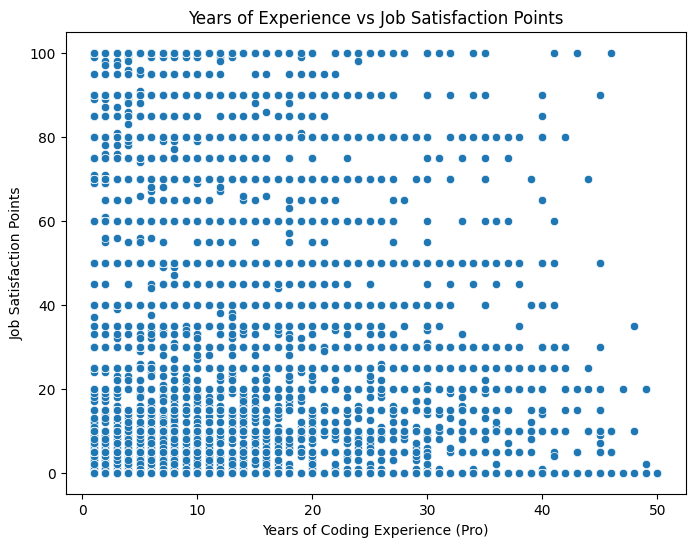

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df)
plt.title("Years of Experience vs Job Satisfaction Points")
plt.xlabel("Years of Coding Experience (Pro)")
plt.ylabel("Job Satisfaction Points")
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [22]:
# Cross-tab
edu_emp = pd.crosstab(df['EdLevel'], df['Employment'])
(edu_emp).head()




Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Student, part-time","Employed, full-time;Student, full-time;Student, part-time;Employed, part-time","Employed, full-time;Student, part-time","Employed, full-time;Student, part-time;Employed, part-time","Employed, part-time","Employed, part-time;Retired","Independent contractor, freelancer, or self-employed","Independent contractor, freelancer, or self-employed;Employed, part-time","Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Retired","Independent contractor, freelancer, or self-employed;Retired","Independent contractor, freelancer, or self-e

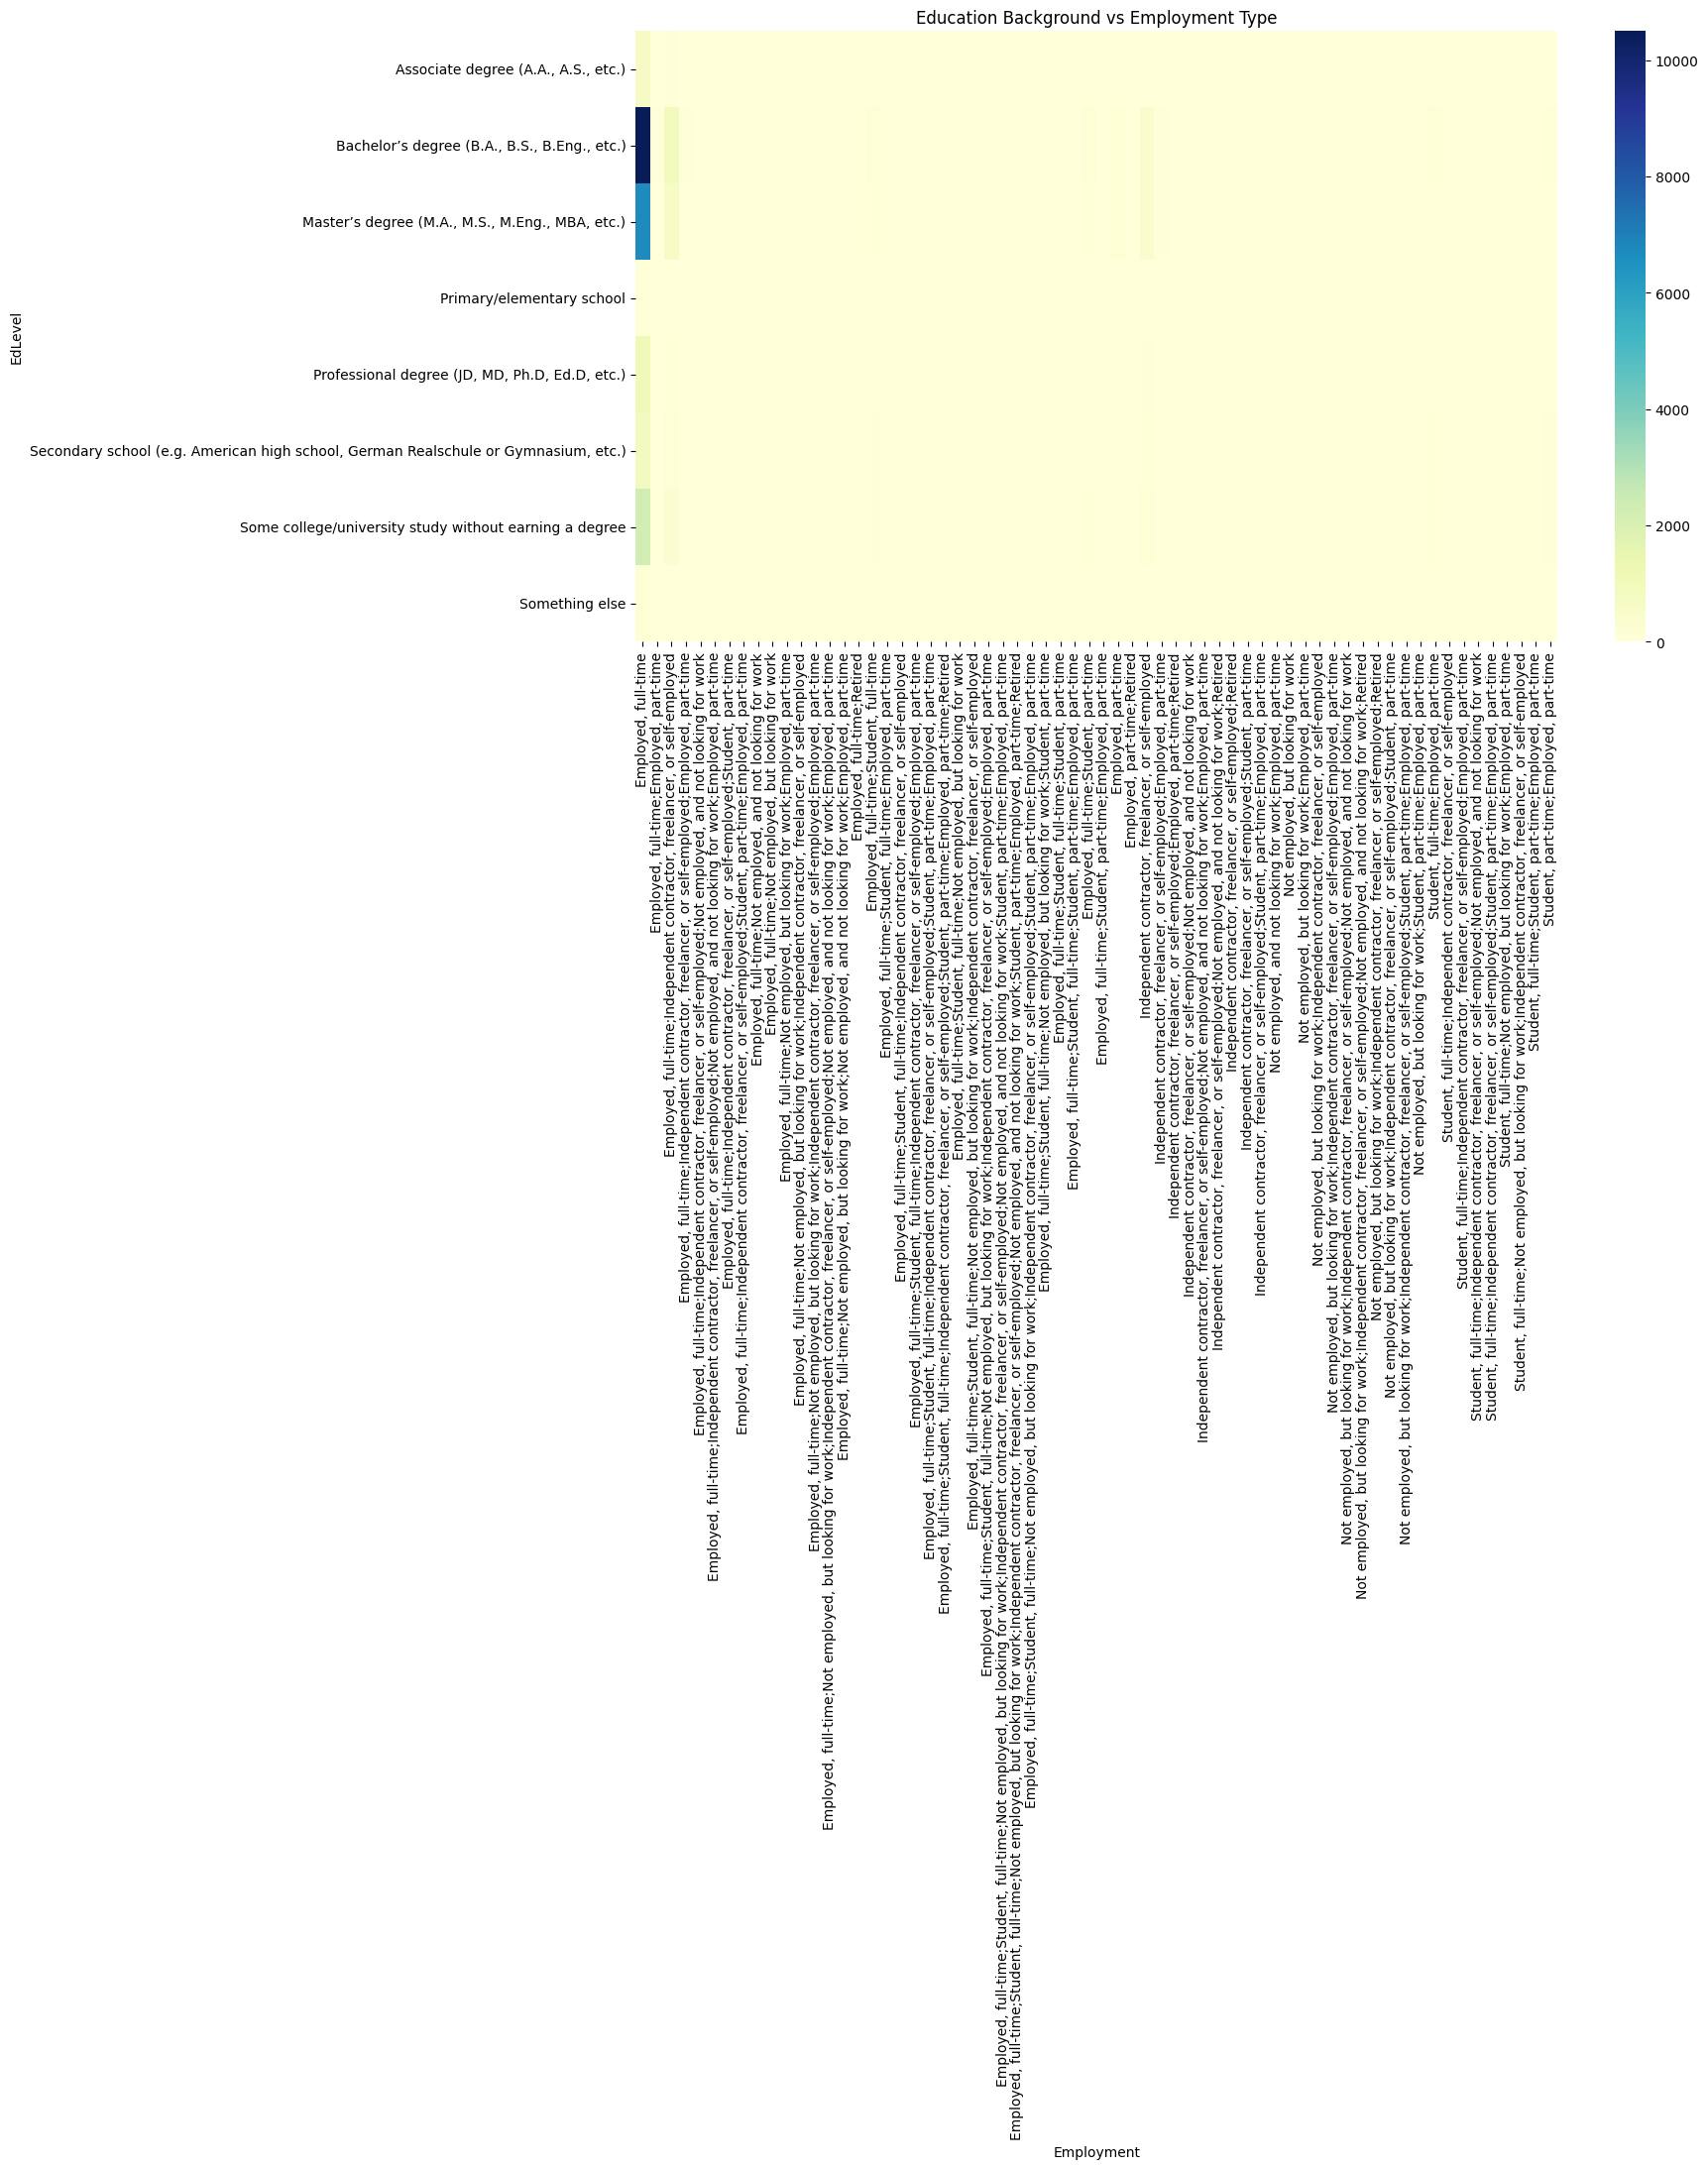

In [24]:
# Heatmap visualization
plt.figure(figsize=(15,8))
sns.heatmap(edu_emp, annot=False, cmap="YlGnBu")
plt.title("Education Background vs Employment Type")
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [25]:
df.to_csv("cleaned_survey_data.csv", index=False)
print("Dataset saved as cleaned_survey_data.csv")


Dataset saved as cleaned_survey_data.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
